In [1]:
import pandas as pd

In [67]:
train = pd.read_csv('FIFA_train.csv')

In [68]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


### stat_overall이 높아도 나이가 많으면 좋은게 아니다.

In [69]:
import matplotlib.pyplot as plt

In [70]:
train['age_stat_overall'] = train['stat_overall']/train['age']

In [71]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_stat_overall
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,3.032258
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,3.370370
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,2.935484
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,2.843750
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,3.600000


In [72]:
import seaborn as sns

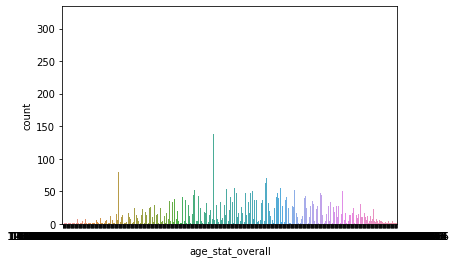

In [73]:
sns.countplot(train['age_stat_overall'])
#'오버롤/나이'에 대한 시각화

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators = 100)

In [76]:
x = train[['age', 'continent', 'position', 'stat_overall', 'stat_potential', 'age_stat_overall']]

In [77]:
x.head()

,age,continent,position,stat_overall,stat_potential,age_stat_overall
0,31,south america,ST,94,94,3.032258
1,27,europe,GK,91,93,3.370370
2,31,south america,ST,91,91,2.935484
3,32,europe,DF,91,91,2.843750
4,25,europe,GK,90,93,3.600000


In [78]:
x['continent'].unique()

array(['south america', 'europe', 'africa', 'asia', 'oceania'],
      dtype=object)

In [79]:
#문자를 숫자로 처리해주는 작업
x['continent'] = x['continent'].map({'south america':0, 'europe':1, 'africa':2, 'asia':3, 'oceania':4})

/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
x.head()

,age,continent,position,stat_overall,stat_potential,age_stat_overall
0,31,0,ST,94,94,3.032258
1,27,1,GK,91,93,3.370370
2,31,0,ST,91,91,2.935484
3,32,1,DF,91,91,2.843750
4,25,1,GK,90,93,3.600000


In [81]:
#포지션도 문자이므로 숫자로 처리해줄것.
x['position'].unique()

array(['ST', 'GK', 'DF', 'MF'], dtype=object)

In [82]:
x['position'] = x['position'].map({'ST':0, 'GK':1, 'DF':2, 'MF':3})

/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
x.head()

,age,continent,position,stat_overall,stat_potential,age_stat_overall
0,31,0,0,94,94,3.032258
1,27,1,1,91,93,3.370370
2,31,0,0,91,91,2.935484
3,32,1,2,91,91,2.843750
4,25,1,1,90,93,3.600000


In [84]:
# 무엇을 예측할 것인지 입력
y = train['value']

In [85]:
rf.fit(x, y)   #x를 통해 y를 알아내겠다

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
test = pd.read_csv('FIFA_test.csv')

In [87]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [88]:
test['age_stat_overall'] = test['stat_overall']/test['age']

In [89]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,age_stat_overall
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0,2.848485
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0,3.538462
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0,3.370370
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0,3.370370
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0,2.843750


In [90]:
x2 = test[['age', 'continent', 'position', 'stat_overall', 'stat_potential', 'age_stat_overall']]

In [91]:
x2.head()

,age,continent,position,stat_overall,stat_potential,age_stat_overall
0,33,europe,ST,94,94,2.848485
1,26,south america,ST,92,93,3.538462
2,27,europe,MF,91,92,3.370370
3,27,europe,ST,91,91,3.370370
4,32,europe,MF,91,91,2.843750


In [92]:
x2['continent'].unique()

array(['europe', 'south america', 'africa', 'asia', 'oceania'],
      dtype=object)

In [93]:
x2['continent'] = x2['continent'].map({'south america':0, 'europe':1, 'africa':2, 'asia':3, 'oceania':4})

/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
x2.head()

,age,continent,position,stat_overall,stat_potential,age_stat_overall
0,33,1,ST,94,94,2.848485
1,26,0,ST,92,93,3.538462
2,27,1,MF,91,92,3.370370
3,27,1,ST,91,91,3.370370
4,32,1,MF,91,91,2.843750


In [95]:
x2['position'].unique()

array(['ST', 'MF', 'DF', 'GK'], dtype=object)

In [96]:
x2['position'] = x2['position'].map({'ST':0, 'GK':1, 'DF':2, 'MF':3})

/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
x2.head()

,age,continent,position,stat_overall,stat_potential,age_stat_overall
0,33,1,0,94,94,2.848485
1,26,0,0,92,93,3.538462
2,27,1,3,91,92,3.370370
3,27,1,0,91,91,3.370370
4,32,1,3,91,91,2.843750


In [98]:
answer2 = test['id']   #동명이인 경우 고려하여 id값을 넣음

In [99]:
answer2 = pd.DataFrame(answer)
answer2

,id,value
0,1,110500000.0
1,2,58000000.0
2,4,63000000.0
3,5,72000000.0
4,6,60000000.0
5,10,62000000.0
6,11,63000000.0
7,15,54000000.0
8,17,63000000.0
9,23,57000000.0


In [100]:
answer2['value'] = rf.predict(x2)
# 컴퓨터가 학습한 것을 토대로 예측을 완료

In [101]:
answer2.head()    # age_stat_overall 기준으로 value로 순위가 매겨짐

,id,value
0,1,51000000.0
1,2,69500000.0
2,4,63000000.0
3,5,73500000.0
4,6,51000000.0


In [102]:
answer2.to_csv('answer2.csv', index = False)